<h1 style="color: #00BFFF;">00 |</h1>

In [25]:
# 📚 Basic libraries
import pandas as pd # data manipulation
import os # file managment
import warnings # warnings managment
import matplotlib.pyplot as plt # 2D visualizations
import seaborn as sns # high-resolution visualization

# 🤖 Machine Learning
from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.model_selection import train_test_split # train/test sets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [3]:
# ⚙️ Settings
pd.set_option('display.max_columns', None) # display all columns
warnings.filterwarnings('ignore') # ignore warnings

<h2 style="color: #008080;">Data Extraction</h2>

In [4]:
file_path = os.path.join("C:/Users/apisi/01. IronData/01. GitHub/03. Projects/05_patern_pending/00_data", "df.csv")
df = pd.read_csv(file_path, index_col=0) # to deal with an error `Unnamed: 0` column
df = df.reset_index()

<h1 style="color: #00BFFF;">04 | Data Processing</h1>

<h2 style="color: #008080;">X-Y Split</h2>

In [5]:
# Split the data into input and target variables
X = df.drop("price", axis=1)
y = df["price"]

<h2 style="color: #008080;">Normalizing the Data</h2>

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

<h1 style="color: #00BFFF;">04 | Modeling</h1>

<h2 style="color: #008080;">Train-Test Split</h2>

In [7]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
# test_size = We give 30% for testing and 70% for testing
# random_state = it'll improve the model to divide always the model in the same way

In [8]:
len(X_scaled)*0.7 # Len before the test

15116.499999999998

In [9]:
len(X_test) # Len after the test

6479

<h2 style="color: #008080;">Model Validation</h2>

In [10]:
model = LinearRegression() # We pick our model
model.fit(X_train,y_train) # We fit the training data into the model

LinearRegression()

In [22]:
# Train data for the model
model.fit(X_train,y_train) # We fit the training data into the model

# Predictions
predictions = model.predict(X_test)

r2_3 = r2_score(y_test, predictions)
RMSE_3 = mean_squared_error(y_test, predictions, squared=False)
MSE_3 = mean_squared_error(y_test, predictions)
MAE_3 = mean_absolute_error(y_test, predictions)

#Printing the results
print("R2 = ", round(r2_3, 4))
print("RMSE = ", round(RMSE_3, 4))
print("The value of the metric MSE is ", round(MSE_3, 4))
print("MAE = ", round(MAE_3, 4))

R2 =  0.6326
RMSE =  218841.0967
The value of the metric MSE is  47891425625.3193
MAE =  141684.4693


<h2 style="color: #008080;">Presenting the results</h2>

In [23]:
# Dataframe for true, predicted and absolute difference values
results = pd.DataFrame()
results['true'] = y_test
results['pred'] = predictions
results['diff'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)

# Scale the true and predicted values to be between 0 and 1
results['true_scaled'] = (results['true'] - results['true'].min()) / (results['true'].max() - results['true'].min())
results['pred_scaled'] = (results['pred'] - results['pred'].min()) / (results['pred'].max() - results['pred'].min())

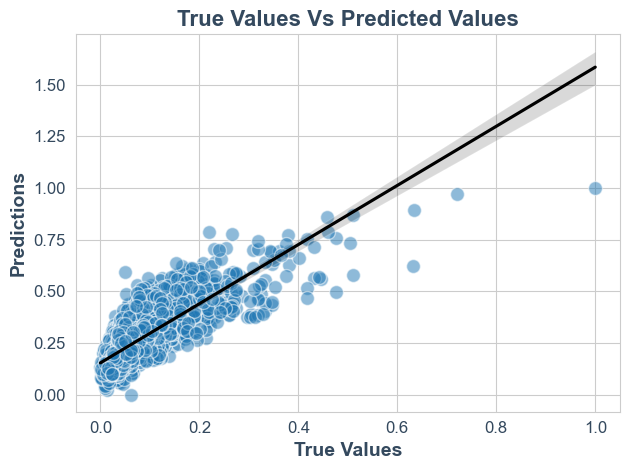

In [27]:
sns.set_style('whitegrid')
sns.regplot(x='true_scaled', y='pred_scaled', data=results, color='black', scatter_kws={'s': 100, 'color': '#1f77b4', 'alpha': 0.5, 'edgecolor': 'w'})
plt.xlabel('True Values', fontsize=14, fontweight='bold', color='#34495e')
plt.ylabel('Predictions', fontsize=14, fontweight='bold', color='#34495e')
plt.title('True Values Vs Predicted Values', fontsize=16, fontweight='bold', color='#34495e')
plt.xticks(fontsize=12, color='#34495e')
plt.yticks(fontsize=12, color='#34495e')
plt.tight_layout()
plt.show()

<h1 style="color: #00BFFF;">04 | v.2. Refining the model</h1>

In [28]:
scores = []
scores2 = []# We will store here the R2 values for each of our K-NN models with different K-values.
for i in range(2,20): 
    knn_model = KNeighborsRegressor(n_neighbors=i)
    knn_model2 = KNeighborsRegressor(n_neighbors=i, weights='distance')
    knn_model.fit(X_train, y_train)
    knn_model2.fit(X_train, y_train)
    scores.append(knn_model.score(X_test, y_test))
    scores2.append(knn_model2.score(X_test, y_test))

NameError: name 'KNeighborsRegressor' is not defined